In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import sys

from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import time


plt.rcParams["figure.figsize"] = (9, 6)
warnings.simplefilter("ignore")

sys.path.append("../1_Format_donnees/")
from aggregation import load_and_preprocess_agg_metrics, Scaler_Metrics
sys.path.append("../")

from evaluate import plot_confusion_matrix, get_scores, plot_feature_importance

### <8 mbits en cumsum = bruit 

In [2]:
WINDOW_SIZE = 60
STEP = 15
MIN_DURA = 15

# Load Data

In [3]:
time_counter = time.time_ns()

df_test = load_and_preprocess_agg_metrics("../Mesures/test", window_size = WINDOW_SIZE, step = STEP, min_duration = MIN_DURA )
df_train = load_and_preprocess_agg_metrics("../Mesures/train", window_size = WINDOW_SIZE, step = STEP)

process_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Dataset generation took : {process_duration} s")

Load datasets...
Extracting ../Mesures/test\messenger20221124_151137.csv.... 1/7


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 13.40it/s]


Extracting ../Mesures/test\messenger20230208_132747.csv.... 2/7


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:03<00:00,  7.44it/s]


Extracting ../Mesures/test\skype20221206_150902.csv.... 3/7


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.12it/s]


Extracting ../Mesures/test\spotify20230127_134348.csv.... 4/7


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 551.65it/s]


Extracting ../Mesures/test\twitch20221124_163054.csv.... 5/7


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 20.23it/s]


Extracting ../Mesures/test\youtube20221118_104205.csv.... 6/7


100%|███████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 532.69it/s]


Extracting ../Mesures/test\youtube20230117_121925.csv.... 7/7


  0%|                                                                                          | 0/765 [00:00<?, ?it/s]

Splitting the data in windows...


  0%|                                                                                        | 0/10053 [00:00<?, ?it/s]

Computing metrics and statistics...


100%|████████████████████████████████████████████████████████████████████████████| 10053/10053 [04:35<00:00, 36.48it/s]


Load datasets...
Extracting ../Mesures/train\messenger20221117_125310.csv.... 1/39


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 113.72it/s]


Extracting ../Mesures/train\messenger20221124_143112.csv.... 2/39


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 40.20it/s]


Extracting ../Mesures/train\messenger20221125_130559.csv.... 3/39


100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 93.33it/s]


Extracting ../Mesures/train\messenger20221129_131204.csv.... 4/39


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 11.94it/s]


Extracting ../Mesures/train\messenger20221129_151124.csv.... 5/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.74it/s]


Extracting ../Mesures/train\messenger20230207_133921.csv.... 6/39


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.38it/s]


Extracting ../Mesures/train\messenger20230209_083453.csv.... 7/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.52it/s]


Extracting ../Mesures/train\pure_noise20230106_132210.csv.... 8/39


100%|███████████████████████████████████████████████████████████████████████████████| 805/805 [00:01<00:00, 608.75it/s]


Extracting ../Mesures/train\skype20221129_164105.csv.... 9/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 11.84it/s]


Extracting ../Mesures/train\skype20221206_125510.csv.... 10/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 34.35it/s]


Extracting ../Mesures/train\skype20221208_104403.csv.... 11/39


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.71it/s]


Extracting ../Mesures/train\skype20221208_124925.csv.... 12/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.13it/s]


Extracting ../Mesures/train\skype20221215_151512.csv.... 13/39


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 37.53it/s]


Extracting ../Mesures/train\skype20221215_155618.csv.... 14/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 26.91it/s]


Extracting ../Mesures/train\skype20221215_164208.csv.... 15/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.06it/s]


Extracting ../Mesures/train\skype20221215_174819.csv.... 16/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.27it/s]


Extracting ../Mesures/train\spotify20230201_092702.csv.... 17/39


100%|█████████████████████████████████████████████████████████████████████████████| 1750/1750 [00:03<00:00, 574.39it/s]


Extracting ../Mesures/train\spotify20230203_165507.csv.... 18/39


100%|███████████████████████████████████████████████████████████████████████████████| 522/522 [00:00<00:00, 621.98it/s]


Extracting ../Mesures/train\spotify20230216_141318.csv.... 19/39


100%|███████████████████████████████████████████████████████████████████████████████| 364/364 [00:00<00:00, 631.08it/s]


Extracting ../Mesures/train\twitch20221117_113554.csv.... 20/39


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 95.91it/s]


Extracting ../Mesures/train\twitch20221118_075454.csv.... 21/39


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 47.25it/s]


Extracting ../Mesures/train\twitch20221125_133859.csv.... 22/39


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 75.12it/s]


Extracting ../Mesures/train\twitch20230110_110215.csv.... 23/39


100%|█████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 103.00it/s]


Extracting ../Mesures/train\twitch20230110_120513.csv.... 24/39


100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 264.81it/s]


Extracting ../Mesures/train\twitch20230110_130648.csv.... 25/39


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 393.16it/s]


Extracting ../Mesures/train\youtube20221108_165214.csv.... 26/39
Extracting ../Mesures/train\youtube20221108_182416.csv.... 27/39


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 282.22it/s]


Extracting ../Mesures/train\youtube20221124_125524.csv.... 28/39


100%|███████████████████████████████████████████████████████████████████████████████| 186/186 [00:00<00:00, 553.52it/s]


Extracting ../Mesures/train\youtube20221124_154037.csv.... 29/39


100%|█████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 542.44it/s]


Extracting ../Mesures/train\youtube20221130_103723.csv.... 30/39


 63%|██████████████████████████████████████████████████▊                              | 59/94 [00:00<00:00, 588.83it/s]

Extracting ../Mesures/train\youtube20230110_145404.csv.... 31/39


100%|█████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 580.41it/s]


Extracting ../Mesures/train\youtube20230110_161955.csv.... 32/39


100%|█████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 515.36it/s]


Extracting ../Mesures/train\youtube20230112_125508.csv.... 33/39


  0%|                                                                                           | 0/29 [00:00<?, ?it/s]

Extracting ../Mesures/train\youtube20230112_151029.csv.... 34/39


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 441.63it/s]


Extracting ../Mesures/train\youtube20230112_154749.csv.... 35/39


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 411.84it/s]


Extracting ../Mesures/train\youtube20230112_163634.csv.... 36/39


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 478.27it/s]


Extracting ../Mesures/train\youtube20230117_095221.csv.... 37/39


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 268.06it/s]


Extracting ../Mesures/train\youtube20230118_134041.csv.... 38/39


100%|███████████████████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 235.12it/s]


Extracting ../Mesures/train\youtube20230124_124323.csv.... 39/39


  0%|                                                                                         | 0/5593 [00:00<?, ?it/s]

Splitting the data in windows...


  0%|                                                                                        | 0/23657 [00:00<?, ?it/s]

Computing metrics and statistics...


100%|████████████████████████████████████████████████████████████████████████████| 23657/23657 [12:05<00:00, 32.59it/s]


Dataset generation took : 1548.6787626 s


# Scale

In [4]:
scaler = Scaler_Metrics()
training_data = scaler.fit_transform(df_train)
testing_data = scaler.transform(df_test)
training_data

,reg_lin_R2_TBS_up,reg_lin_coef_A_TBS_up,p0_TBS_up,p10_TBS_up,p25_TBS_up,p50_TBS_up,p75_TBS_up,p90_TBS_up,p100_TBS_up,mean_TBS_up,...,p25_TBS_down,p50_TBS_down,p75_TBS_down,p90_TBS_down,p100_TBS_down,mean_TBS_down,std_TBS_down,sum_TBS_down,mean_per_time_TBS_down,label
id,,,,,,,,,,,,,,,,,,,,,
20221117_125310_4_0,-2.072057,-1.497056,0.893893,-0.049504,-0.711778,-1.391334,-2.001641,-1.436325,-0.240051,-1.718972,...,-0.22648,-0.736049,-1.269605,-1.470613,-0.919345,-1.178339,-0.777600,-1.475897,-1.481635,messenger
20221117_125310_4_15,-2.202636,-1.537432,1.322773,-0.049504,-0.711778,-1.391334,-2.001641,-2.404516,-1.991422,-2.337767,...,-0.22648,-0.736049,-1.344185,-1.572322,-1.050957,-1.300843,-1.131288,-1.495820,-1.500675,messenger
20221117_125310_4_30,-7.570966,-1.415607,1.322773,-0.049504,-0.711778,-1.245331,-1.461120,-0.483501,-0.068663,-1.002338,...,-0.22648,-0.736049,-1.269605,-1.216341,-0.919345,-1.060102,-0.697977,-1.420571,-1.425429,messenger
20221117_125310_4_45,-2.372697,-0.418386,1.322773,0.588305,-0.343847,-1.245331,-0.596286,0.440122,1.311368,0.186634,...,-0.22648,-0.736049,-0.763364,-0.796793,-0.919345,-0.793833,-0.595417,-1.216219,-1.212737,messenger
20221117_125310_4_60,-0.211443,0.070454,1.322773,0.588305,-0.343847,-1.026326,-0.380077,0.538478,1.311368,0.343374,...,-0.22648,-0.736049,-0.763364,-0.758653,-0.919345,-0.715909,-0.593749,-0.994094,-0.980286,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_161_135,-0.010510,-1.488003,0.036131,-0.559751,-1.171692,-1.391334,-1.698949,-2.097154,-1.605799,-1.919325,...,-0.22648,-0.736049,-1.269605,-0.234217,-1.123813,-0.850284,-0.622899,-0.972197,-0.937537,youtube
20230124_124323_161_150,0.139748,-1.494544,0.036131,-0.559751,-0.757769,-1.391334,-1.871916,-2.226246,-1.862881,-1.994594,...,-0.22648,-0.736049,-1.269605,-0.234217,-1.123813,-0.781947,-0.568068,-0.982007,-0.894764,youtube
20230124_124323_166_0,0.087067,-1.465728,0.893893,-1.835369,-1.171692,-1.391334,-1.871916,-2.220099,-0.240051,-2.055499,...,-0.22648,-0.637617,-1.197285,-1.101919,-1.050957,-0.992159,-0.865917,-0.776889,-0.764093,youtube


# Remove Noise

In [5]:
training_data = training_data[training_data .label!="noise"]
testing_data = testing_data[testing_data .label!="noise"]

# Train

In [6]:
time_counter = time.time_ns()

model = RandomForestClassifier(class_weight = "balanced")
model.fit(training_data[training_data.columns[:-1]], training_data.label)

training_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Training Duration : {training_duration} s for a dataset length of {len(training_data.label)}")

Training Duration : 5.5754607 s for a dataset length of 23474


# Test

In [7]:
# mesure efficiency
time_counter = time.time_ns()

preds_labels =  model.predict(testing_data[testing_data.columns[:-1]])
true_labels = testing_data.label

testing_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Testing Duration : {testing_duration} s for a dataset length of {len(testing_data.label)}")
testing_duration_per_item = testing_duration*(10**3)/len(testing_data.label)
print(f"Testing Duration per data : {testing_duration_per_item} ms")

Testing Duration : 0.1468223 s for a dataset length of 10044
Testing Duration per data : 0.014617911190760651 ms


normalized confusion matrix


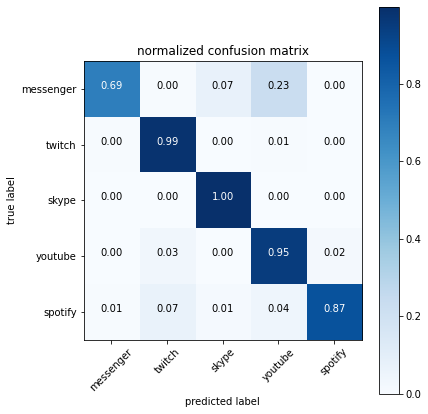

In [8]:
plot_confusion_matrix(true_labels,preds_labels)

In [9]:
get_scores(true_labels,preds_labels)

{'Accuracy': 0.8986758056841022,
 'Precision': 0.899527546173484,
 'Recall': 0.7772799681401832,
 'F1_Score': 0.803688429152173,
 'support': None}

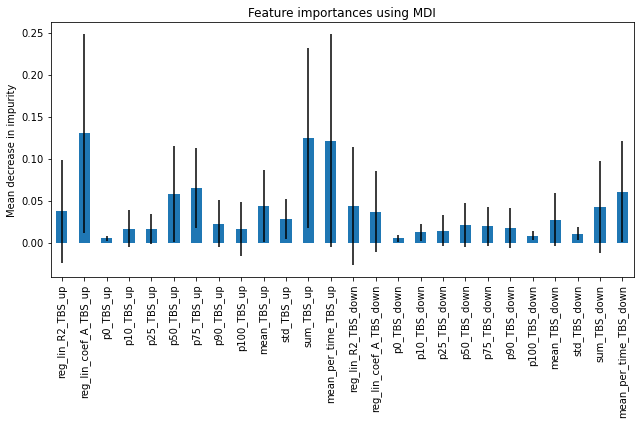

In [10]:

    
plot_feature_importance(model, training_data.columns[:-1])